# Scraping  Twitter and Create Word Clouds.

For fun and for a share for my class I descided to scrap twitter accounts and create word clouds to see what each presidential canidate was saying most often in their tweets.  

I use Python and the tweepy library for the scraping and datacleaning/transforming.
Tableau for the word cloud visualization. 

In [27]:
# Necessary imports
import pandas as pd
import csv

# Tweepy is a library for use with twitter api
import tweepy  
from tweepy import OAuthHandler

In [18]:
# Tweepy is a library for use with twitter api
import tweepy  
from tweepy import OAuthHandler

1. Create a twitter account if you dont allready have one.
    You will need to link a phone number with your account in order to use the twitter API
2. Log in at https://apps.twitter.com/
    If you somehow land on the Twitter Dev page scroll to the bottom and select 'Manage You Apps'
3. Create an app to get your consumer and Access Keys and secrets.  
    I used Google.com as my url because, why not.  
4. Use this scraper i found on GitHub (see below)

I also found this guide somewhat helpful.
http://knightlab.northwestern.edu/2014/03/15/a-beginners-guide-to-collecting-twitter-data-and-a-bit-of-web-scraping/

In [22]:
# You must have an active twitter account to register your account for API us to get the below.

consumer_key = 'XXXXXXXXXXXXXXXXX'
consumer_secret = 'XXXXXXXXXXXXXXXXX'
access_key = 'XXXXXXXXXXXXXXXXX'
access_secret = 'XXXXXXXXXXXXXXXXX'
 
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
 
api = tweepy.API(auth)

I pulled the below code from https://gist.github.com/yanofsky/5436496

Got to give credit to 'Yan of Sky' or 'Yanofsky'  which ever he prefers.  

In [23]:
def get_all_tweets(screen_name):
    #Twitter only allows access to a users most recent 3240 tweets with this method

    #authorize twitter, initialize tweepy
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_key, access_secret)
    api = tweepy.API(auth)
    
    #initialize a list to hold all the tweepy Tweets
    alltweets = []
    
    #make initial request for most recent tweets (200 is the maximum allowed count)
    new_tweets = api.user_timeline(screen_name = screen_name,count=200)
    
    #save most recent tweets
    alltweets.extend(new_tweets)
    
    #save the id of the oldest tweet less one
    oldest = alltweets[-1].id - 1

    #keep grabbing tweets until there are no tweets left to grab
    while len(new_tweets) > 0:
        print "getting tweets before %s" % (oldest)
        
        #all subsiquent requests use the max_id param to prevent duplicates
        new_tweets = api.user_timeline(screen_name = screen_name,count=200,max_id=oldest)
        
        #save most recent tweets
        alltweets.extend(new_tweets)
        
        #update the id of the oldest tweet less one
        oldest = alltweets[-1].id - 1
        
        print "...%s tweets downloaded so far" % (len(alltweets))
    
    #transform the tweepy tweets into a 2D array that will populate the csv	
    outtweets = [[tweet.id_str, tweet.created_at, tweet.text.encode("utf-8")] for tweet in alltweets]
    
    #write the csv
    with open('%s_tweets.csv' % screen_name, 'wb') as f:
        writer = csv.writer(f)
        writer.writerow(["id","created_at","text"])
        writer.writerows(outtweets)
    
    pass

In [ ]:
# Getting the real donald trumps tweets

if __name__ == '__main__':
    
    get_all_tweets("realDonaldTrump")

In [ ]:
# Getting Chillary Clintons tweets
if __name__ == '__main__':
    
    get_all_tweets("HillaryClinton")

In [ ]:
# Getting Gary johnsons Tweets

if __name__ == '__main__':

    get_all_tweets("GovGaryJohnson")

In [31]:
trump = pd.read_csv('realDonaldTrump_tweets.csv')
hillary = pd.read_csv('HillaryClinton_tweets.csv')
gary = pd.read_csv('GovGaryJohnson_tweets.csv')

In [47]:
trump.head(3)

,id,created_at,text
0,778968533749338112,2016-09-22 14:45:45,"Join me in Roanoke, Virginia on Saturday eveni..."
1,778912230633005056,2016-09-22 11:02:01,Will be on @foxandfriends now.
2,778760237629210624,2016-09-22 00:58:03,"I will be interviewed from Cleveland, Ohio, on..."


In [64]:
hillary.head(3)

,id,created_at,text
0,779066671067762692,2016-09-22 21:15:43,Donald Trump's ties to Russia may conflict wit...
1,779058340315951104,2016-09-22 20:42:37,Very concerned about the outage in Puerto Rico...
2,779055195607166977,2016-09-22 20:30:07,The man who could be your next president may b...


In [49]:
gary.head(3)

,id,created_at,text
0,779080197782077440,2016-09-22 22:09:28,Snapping tonight. #teamgov #snapchat https://t...
1,779047633679683584,2016-09-22 20:00:04,"Yes, I KNOW why I'm voting. https://t.co/FhOsY..."
2,779032879993069568,2016-09-22 19:01:26,62% of Americans want real debates. Sign the p...


In [34]:
import itertools

This next part is converting the text column which we want into rows of just one word per row

In [79]:
# First we convert each twitter post into a list with each list value being a single word
trump_list = trump['text'].apply(lambda x: x.split(' '))

X_trump = []
for item in trump_list:
    X_trump.append(item)
# now we have a list of lists where each individual list is a tweet and each list component is a separate word.    

#iterates through each list and makes it just one single list for all words.
X_trump2 = list(itertools.chain.from_iterable(X_trump))

In [ ]:
trump_df = pd.DataFrame(X_trump2)
trump_df[0] = trump_df[0].str.lower()


In [65]:
hillary_list = hillary['text'].apply(lambda x: x.split(' '))

X_hillary = []
for item in hillary_list:
    X_hillary.append(item)
    

X_hillary2 = list(itertools.chain.from_iterable(X_hillary))

In [67]:
hillary_df = pd.DataFrame(X_hillary2)
hillary_df[0] = hillary_df[0].str.lower()

In [45]:
gary_list = gary['text'].apply(lambda x: x.split(' '))

X_gary = []
for item in gary_list:
    X_gary.append(item)
    
X_gary2 = list(itertools.chain.from_iterable(X_gary))

In [ ]:
gary_df = pd.DataFrame(X_gary2)
gary_df[0] = gary_df[0].str.lower()


Time to remove stop words.  I converted all my words to lowercase earlier so Stop_Words doesnt miss case sensitivity.  

In [50]:
from stop_words import get_stop_words
stop_words = get_stop_words('en')

In [71]:
# Removing stop words from dataframes (making a dataframe of words that appear that are not in stop_words)
trump_df = trump_df[~trump_df[0].isin(stop_words)]
hillary_df = hillary_df[~hillary_df[0].isin(stop_words)]
gary_df = gary_df[~gary_df[0].isin(stop_words)]

In [76]:
# Export to CSV for fun baby.
trump_df.to_csv('trump_twitter_clean.csv', encoding='utf-8')
hillary_df.to_csv('hillary_twitter_clean.csv', encoding='utf-8')
gary_df.to_csv('gary_twitter_clean.csv', encoding='utf-8')

# Creating a Word Cloud in Tableau:
After loading your data into Tableau you want to make sure of a few things.

1. That what you are trying to convert (the target) into a Word Cloud is a Dimension.  
    Dimensions are on top and will create Blue pills when dragged onto the staging area.
    Measures are in the space below and will create Green Pills when dragged into the staging area.
    Note: We will be converting our Target Dimension to a Measure a few times.
    
2. Your default graph type is set to 'Square'.  You can see the graph type within the 'Marks' box.
    Elements in the 'Marks' box such as 'Color', 'Size' and 'label' can be refered to as 'Filter Options' not to be           confused with the 'Filters' box right above.
    When Handling large datasets Tableau can use alot of processing power when trying to scale a 'text' type chart             using sizes.  By starting with a 'Square' type chart we can avoid this issue and apply a filter later on to           deal with it.

### Step 1:
Identify your target category (for this example I use "Gary's words") and drag it onto the 'Size' filter in the 'Marks' box.

In [31]:
![Step 1]('Images/Step1.png')

/bin/sh: -c: line 0: syntax error near unexpected token `('
/bin/sh: -c: line 0: `[Step 1]('Images/Step1.png')'


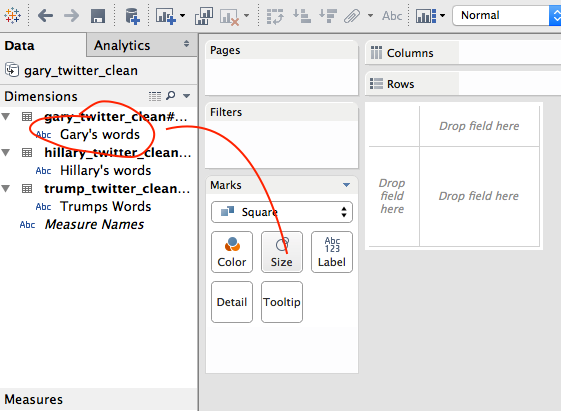

In [28]:
![caption for image](path to image)

### Step 2: 
Convert the resulting Dimension pill into a 'Count' Measure.
Notice how the color changes from Blue to Green

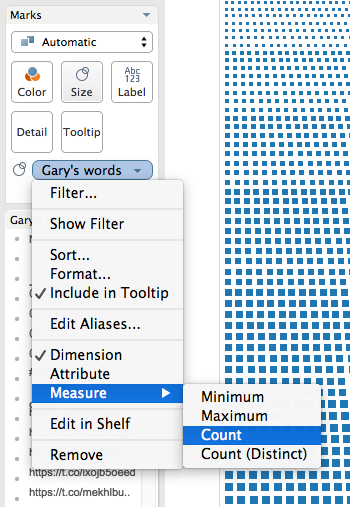

In [11]:
Image(filename = "Step2.png", width=300, height=300)

### Step 3:
Once again, grab the Target Dimension and drag it into the Staging Area.
Drop it on the 'Label' filter in the 'Marks' box.

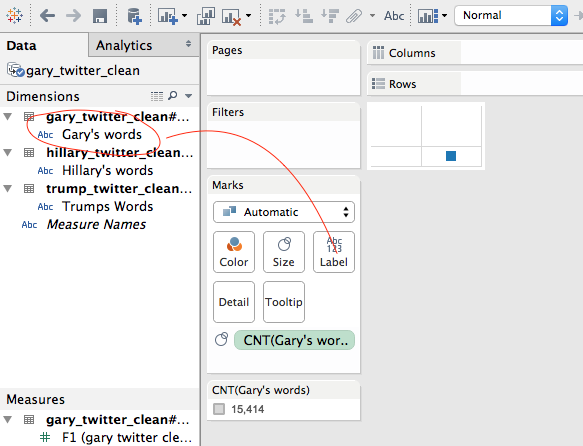

In [13]:
Image(filename = "step3.png", width=400, height=400)

### Step 4:
We now get to see things coming together and the thousands of tiny squares that we dont care about too much.  

If you are using a small dataset ( < 1000) you can try changing the Chart type to 'text', but if we did that it would take Tableau a really long time to process it.

Instead, we are going to create a filter.  Once more we are going to start by grabing out target dimension and dragging it into the 'Marks' box.  Just drop it below the other two pills as its not going to stay there long.

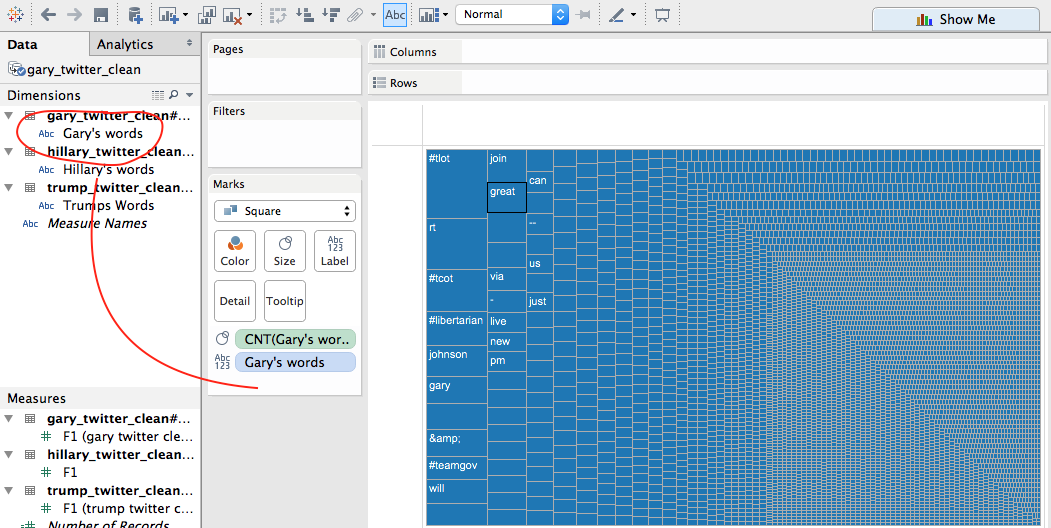

In [18]:
Image(filename = "step4.png", width=600, height=600)

### Step 5:
Convert the new pill into a count measure again (Step 2, if you forgot).
Once it is converted, drag the pill up into the 'Filters' box.

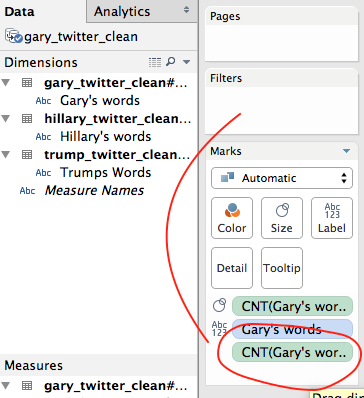

In [19]:
Image(filename = "step5.png", width=300, height=300)

### Step 6:
If all goes right you should have an edit filter box pop up like the one below.
Select the criteria you want to not include.
In this example we are excluding all words that appeared 20 times or fewer. 

Tip: If you right-click on your filter pill you can select 'Show-Filter which will create a nifty little slide scaler to adjust your filter criteria on the fly.

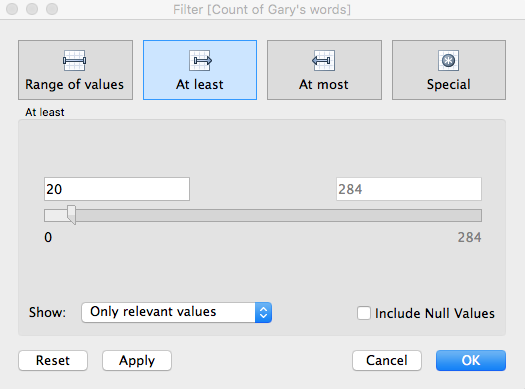

In [21]:
Image(filename = "step6.png", width=500, height=500)

### Step 7:
Now that we have our filter set up we can convert the chart to a text based chart without worry of using an excessive amount of processing and time.

From the drop-down menu at the top of the 'Marks' box select ' Text'.

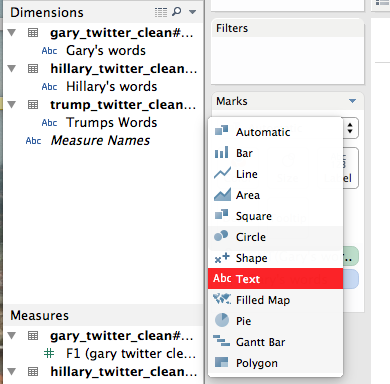

In [23]:
Image(filename = "step7.png", width=400, height=400)

#### Ta Da!

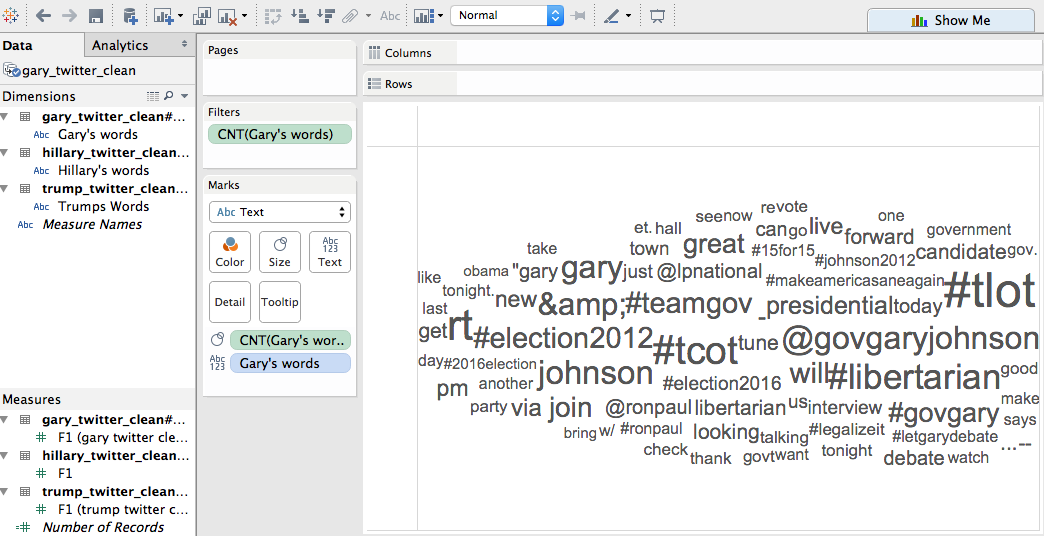

In [26]:
Image(filename = "step7.1.png", width=600, height=600)

### Step 8:
If you are happing with your cloud, you can stop here, but I also added a color density feature which helps words 'pop' a little more.

Grab you target Dimension again and drag it onto the color filter in the 'Marks' box.  Select the new pill (it will be the blue one with the color logo next to it and convert it to the Count Measure again.

You can also drag another any other feature you have here and see how each Dimension feature correlates to the Measure.

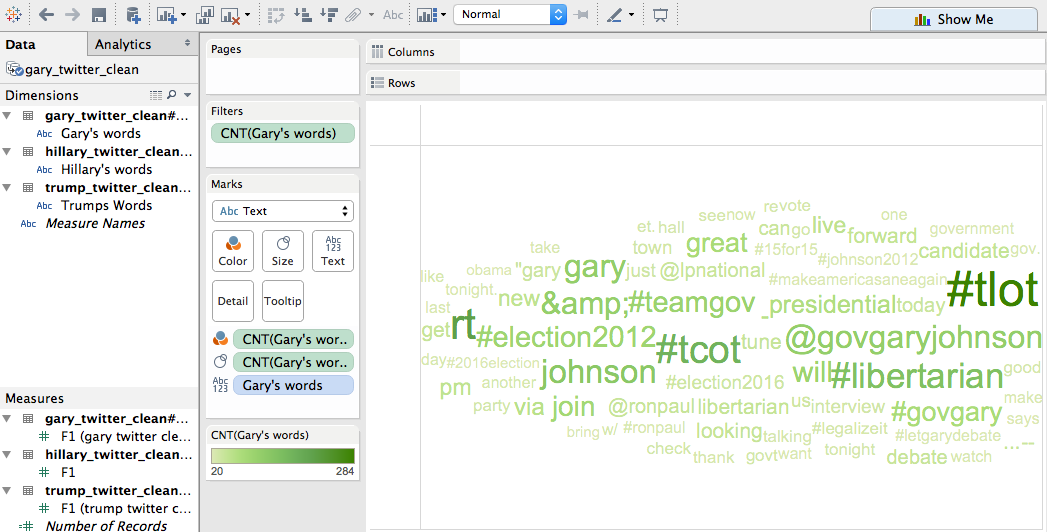

In [25]:
Image(filename = "step8.png", width=600, height=600)